In [1]:
# importing required packages
import networkx as nx 
import matplotlib.cbook
from collections import defaultdict
import numpy as np

In [2]:
#Defining class to create the graph
class Graph:
    #Constructor used to initialise an object
    def __init__(self, vlist = []):
        self.index = {v:i for i,v in enumerate(vlist)}    # looks up index given name
        self.vertex = {i:v for i,v in enumerate(vlist)}   # looks up name given index
        self.edge = []
        self.edgelabel = []
    #addEdge function to add the edges
    def addEdge(self, vsrc, vdst, label='', repeats=True):
        e = (self.index[vsrc], self.index[vdst])
        if (repeats) or (e not in self.edge):
            self.edge.append(e)
            self.edgelabel.append(label)
    #addVertex function to add the vertices
    def addVertex(self, label):
        index = len(self.index)
        self.index[label] = index
        self.vertex[index] = label 
    #Function to find degrees of a node
    def degrees(self):
        inDegree = {}
        outDegree = {}
        for src, dst in self.edge:
            outDegree[src] = outDegree.get(src, 0) + 1
            inDegree[dst] = inDegree.get(dst, 0) + 1
        return inDegree, outDegree
    #verifyAndGetStart used to obtain the starting kmer node
    def verifyAndGetStart(self):
        inDegree, outDegree = self.degrees()
        start, end = 0, 0
        # node 0 will be the starting node is a Euler cycle is found
        for vert in self.vertex:
            ins = inDegree.get(vert,0)
            outs = outDegree.get(vert,0)
            if (ins == outs):
                continue
            elif (ins - outs == 1):
                end = vert
            elif (outs - ins == 1):
                start = vert
            else:
                start, end = -1, -1
                break
        if (start >= 0) and (end >= 0):
            return start
        else:
            return -1
    
    #Function to find the Eulerian Path
    def eulerianPath(self):
        graph = [(src,dst) for src,dst in self.edge]
        currentVertex = self.verifyAndGetStart()
        path = [currentVertex]
        # "next" is the list index where vertices get inserted into our tour
        # it starts at the end (i.e. same as appending), but later "side-trips" will insert in the middle
        next = 1
        while (len(graph) > 0):                   # when all edges are used, len(graph) == 0
            # follows a path until it ends
            for edge in graph:
                if (edge[0] == currentVertex):
                    currentVertex = edge[1]
                    graph.remove(edge)
                    path.insert(next, currentVertex)  # inserts vertex in path
                    next += 1
                    break
            else:
                # Look for side-trips along the current path
                for edge in graph:
                    try:
                        # insert our side-trip after the "u" vertex that is starts from
                        next = path.index(edge[0]) + 1
                        currentVertex = edge[0]
                        break
                    except ValueError:
                        continue
                else:
                    print("There is no path!")
                    return False
        return path
    #Function to find the Euler Edges from the given edges
    def eulerEdges(self, starting, path):
        edgeId = {}
        for i in range(len(self.edge)):
            edgeId[self.edge[i]] = edgeId.get(self.edge[i], []) + [i]
        edgeList = [self.vertex[starting]]
        for i in range(len(path)-1):
            edgeList.append(self.edgelabel[edgeId[path[i],path[i+1]].pop()])
        return edgeList           

In [3]:
#Function used to retrieve the kmers

def get_kmers(seq,k):
    kmerlist = []
    for i in range(len(seq)-k+1):
        kmerlist.append(seq[i:i+k])
    return kmerlist

In [5]:
seq = input("Enter the sequence here --> ")

Enter the sequence here --> TGAGATAGTCGACCTGACTAATC


In [6]:
k =int(input("Enter the value of k --> "))
kmers = get_kmers(seq, k)

Enter the value of k --> 3


In [22]:
print("The kmers are:")
kmers

The kmers are:


['AAT',
 'ACC',
 'ACT',
 'AGA',
 'AGT',
 'ATA',
 'ATC',
 'CCT',
 'CGA',
 'CTA',
 'CTG',
 'GAC',
 'GAC',
 'GAG',
 'GAT',
 'GTC',
 'TAA',
 'TAG',
 'TCG',
 'TGA',
 'TGA']

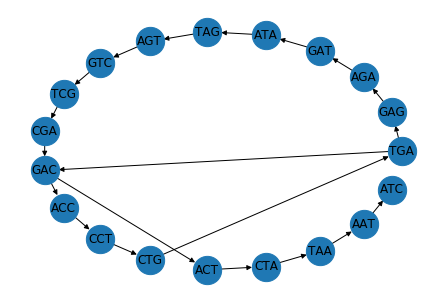

In [9]:
debrujn_graph =  nx.DiGraph()
for i in range(len(kmers)-1):
    debrujn_graph.add_edge(kmers[i], kmers[i+1])
#Drawing the directed graph
nx.draw_shell(debrujn_graph, with_labels = True,node_size = 800)

In [10]:
g = Graph()
Vertex = list(set(kmers))
for val in Vertex:
    g.addVertex(val)
for i in range(len(kmers) - 1):
    g.addEdge(kmers[i], kmers[i+1], kmers[i+1])

In [11]:
path = g.eulerianPath()
print(path)

[4, 15, 14, 3, 18, 12, 2, 8, 10, 13, 6, 5, 7, 16, 4, 6, 11, 9, 0, 1, 17]


In [23]:
print("The lexicographic order of the kmers list is:")
kmers.sort()
kmers

The lexicographic order of the kmers list is:


['AAT',
 'ACC',
 'ACT',
 'AGA',
 'AGT',
 'ATA',
 'ATC',
 'CCT',
 'CGA',
 'CTA',
 'CTG',
 'GAC',
 'GAC',
 'GAG',
 'GAT',
 'GTC',
 'TAA',
 'TAG',
 'TCG',
 'TGA',
 'TGA']

In [28]:
#Obtaining the indegree and outdegree of the nodes
indegree, outdegree = g.degrees()

print("The outdegree of each kmer node is:", end = " ")
outdegree

The outdegree of each kmer node is: 

{4: 2,
 15: 1,
 14: 1,
 3: 1,
 18: 1,
 12: 1,
 2: 1,
 8: 1,
 10: 1,
 13: 1,
 6: 2,
 5: 1,
 7: 1,
 16: 1,
 11: 1,
 9: 1,
 0: 1,
 1: 1}

In [14]:
#Obtaining the starting index
start_index = g.verifyAndGetStart()
print("The starting node index is:", end = " ")
print(start_index)

The starting node index is: 4


In [15]:
print("Printing the vertices of the graph:")
g.vertex

Printing the vertices of the graph:


{0: 'TAA',
 1: 'AAT',
 2: 'AGT',
 3: 'GAT',
 4: 'TGA',
 5: 'ACC',
 6: 'GAC',
 7: 'CCT',
 8: 'GTC',
 9: 'CTA',
 10: 'TCG',
 11: 'ACT',
 12: 'TAG',
 13: 'CGA',
 14: 'AGA',
 15: 'GAG',
 16: 'CTG',
 17: 'ATC',
 18: 'ATA'}

In [16]:
#Printing the Euler Edges
Euler_edge = g.eulerEdges(start_index, path)
Euler_edge

['TGA',
 'GAG',
 'AGA',
 'GAT',
 'ATA',
 'TAG',
 'AGT',
 'GTC',
 'TCG',
 'CGA',
 'GAC',
 'ACC',
 'CCT',
 'CTG',
 'TGA',
 'GAC',
 'ACT',
 'CTA',
 'TAA',
 'AAT',
 'ATC']

In [17]:
#Reconstruction from Euler Path
recons_seq = Euler_edge[0]
for i in range (1, len(Euler_edge)):
        recons_seq = recons_seq + Euler_edge[i][-1]
#Printing the sequence obtained from the Eulerian Path from De bruijn Graph
print(recons_seq)

TGAGATAGTCGACCTGACTAATC


In [18]:
#To check whether reconstructed string is the original string
if(recons_seq == seq):
    print("The reconstructed string is same as original sequence")
else:
    print("The reconstructed string is not same as original sequence")

The reconstructed string is same as original sequence


In [19]:
#Printing the edges in indices representation
g.edge

[(4, 15),
 (15, 14),
 (14, 3),
 (3, 18),
 (18, 12),
 (12, 2),
 (2, 8),
 (8, 10),
 (10, 13),
 (13, 6),
 (6, 5),
 (5, 7),
 (7, 16),
 (16, 4),
 (4, 6),
 (6, 11),
 (11, 9),
 (9, 0),
 (0, 1),
 (1, 17)]

In [20]:
#The edge labels stored
g.edgelabel

['GAG',
 'AGA',
 'GAT',
 'ATA',
 'TAG',
 'AGT',
 'GTC',
 'TCG',
 'CGA',
 'GAC',
 'ACC',
 'CCT',
 'CTG',
 'TGA',
 'GAC',
 'ACT',
 'CTA',
 'TAA',
 'AAT',
 'ATC']

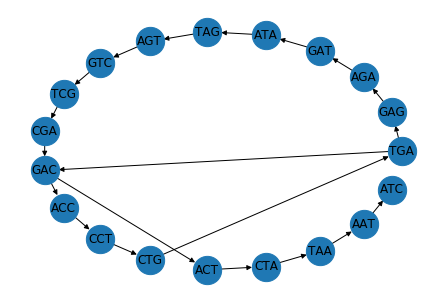

In [21]:
#Creating a directed Graph from Euler path
dgraph = nx.DiGraph()
for i in range(len(path)-1):
    dgraph.add_edge(g.vertex[path[i]], g.vertex[path[i+1]])
#Drawing the directed graph
nx.draw_shell(dgraph,with_labels = True,node_size=800)